# Class Test 3

__Anish Sachdeva (DTU/2K16/MC/013)__

__Atharva Shende (DTU/2K17/MC/028)__

__Nilay Pant (2K17/CO/210)__

### Question: WAP to compute relative entropy, mutual information, KL divergence of 2 given patterns and compute them. (1.6)

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import cv2
from typing import List

### Entropy
$$
H(X) = - \sum P_i \log_{2}(P_i) 
$$

In [96]:
def prob_mass_function(X: np.ndarray) -> np.ndarray:
    unique, count = np.unique(X, return_counts=True, axis=0)
    return count / len(X)

In [97]:
def entropy(Y) -> float:
    prob = prob_mass_function(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en

In [98]:
def entropy_image(I: np.ndarray) -> float:
    return entropy(np.ravel(I))

### Laoding in Lenna Image

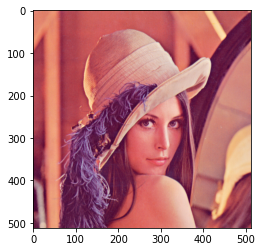

In [99]:
I = cv2.imread('../data/lenna.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)

In [100]:
entropy_image(I)

7.7501974797431625

### Kullback Leibler Divergence
$$
D_{KL}(P || Q) = \sum P * \log_{2}\frac{P}{Q}
$$

In [101]:
def probability_dist(I):
    return np.histogramdd(np.ravel(I), bins = 256)[0] / I.size

In [102]:
def kl_divergence(I: np.ndarray, J: np.ndarray) -> float:
    epsilon = 1e-10
    P = prob_dist(I) + epsilon
    Q = prob_dist(J) + epsilon
    return np.where(P != 0, P * np.log2(P / Q), 0).sum()

### Salt and Pepper Noise
$$
I(x, y) = \begin{cases}
    P_0 & 0 \leq P[I(x, y)] \leq \frac{d}{2} \\
    P_{255} & \frac{d}{2} \leq P[I(x, y)] \leq d \\
    I(x, y) & \text{otherwise}
\end{cases}
$$

In [103]:
def salt_and_pepper_noise(I: np.ndarray, d: float) -> np.ndarray:
    J = I.copy()
    m, n , _ = I.shape
    prob = np.random.rand(m, n)
    J[prob < d / 2] = [0, 0, 0]
    J[(d / 2 < prob) & (prob < d)] = [255, 255, 255]
    return J

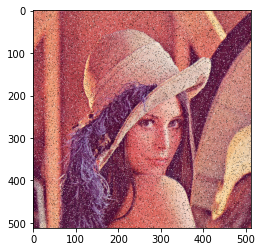

In [104]:
plt.imshow(salt_and_pepper_noise(I, 0.1))

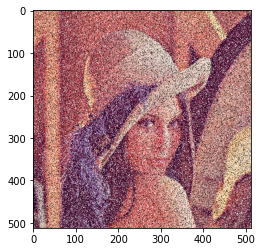

In [105]:
plt.imshow(salt_and_pepper_noise(I, 0.3))

In [106]:
# relative entropy / KL divergence of 2 images
kl_divergence(I, salt_and_pepper_noise(I, 0.2))

0.35747843926041745

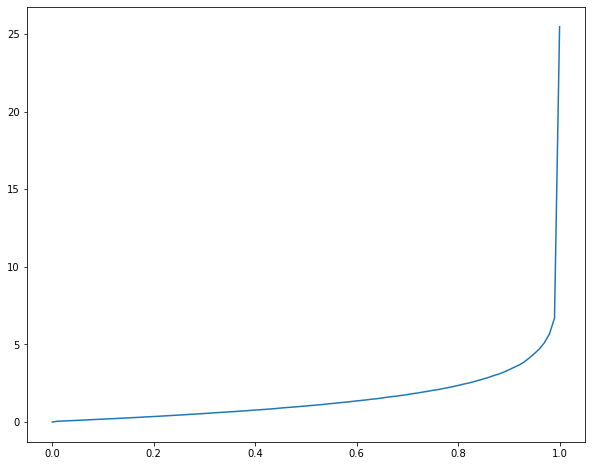

In [107]:
# plotting relative entropy
plt.figure(figsize=(10, 8))
X = [d / 100 for d in range(101)]
plt.plot(X, [kl_divergence(I, salt_and_pepper_noise(I, x)) for x in X])

### Mutual Information
$$
I(X, Y) = H(X) - H(X | Y)
$$
Here $H(X)$ is entropy of Image X.

In [108]:
def joint_entropy(Y, X):
    return entropy(np.c_[Y, X])

In [109]:
def joint_entropy_images(Y: np.ndarray, X: np.ndarray) -> float:
    return joint_entropy(np.ravel(Y), np.ravel(X))

In [110]:
def conditional_entropy(X: np.ndarray, Y: np.ndarray) -> float:
     return joint_entropy(X, Y) - entropy(Y)

In [111]:
def conditional_entropy_images(X: np.ndarray, Y: np.ndarray) -> float:
     return conditional_entropy(np.ravel(X), np.ravel(Y))

In [112]:
def mutual_information(X: np.ndarray, Y: np.ndarray) -> float:
    return entropy(X) - conditional_entropy(X, Y)

In [113]:
def mutual_information_images(I: np.ndarray, J: np.ndarray) -> float:
    return mutual_information(np.ravel(I), np.ravel(J))

In [114]:
mutual_information_images(I, salt_and_pepper_noise(I, 0.2))

6.191021652454266

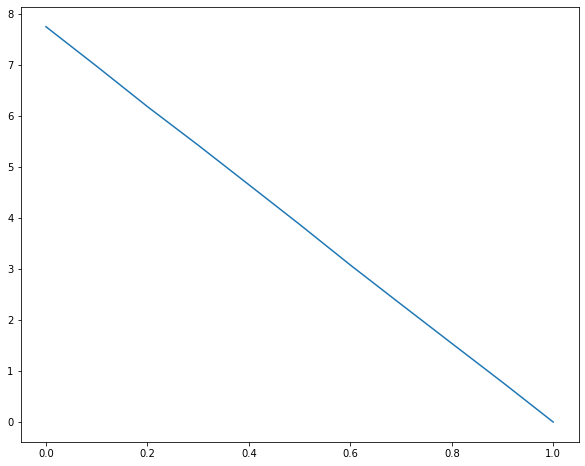

In [115]:
# plotting mutual information w.r.t noise in image
plt.figure(figsize=(10, 8))
X = [d / 10 for d in range(11)]
plt.plot(X, [mutual_information_images(I, salt_and_pepper_noise(I, x)) for x in X])